In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('al_used_cars.csv')

In [3]:
len(df)

4952

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7301592117,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,https://bham.craigslist.org,28990,2006.0,Bentley,Continental GT,NaN,12 cylinders,...,NaN,coupe,NaN,https://images.craigslist.org/00f0f_VhiDwoGEzv...,2006 *Bentley* *Continental GT* 2dr Coupe - $2...,NaN,al,33.669601,-86.817617,2021-04-04T04:40:16-0500
1,7301611362,https://huntsville.craigslist.org/ctd/d/decatu...,huntsville / decatur,https://huntsville.craigslist.org,32590,2017.0,lexus,rx 350 sport utility 4d,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00101_49DICKnthP...,Carvana is the safer way to buy a car During t...,NaN,al,34.570000,-86.980000,2021-04-04T07:32:58-0500
2,7301613318,https://tuscaloosa.craigslist.org/ctd/d/tuscal...,tuscaloosa,https://tuscaloosa.craigslist.org,27590,2018.0,infiniti,qx60 3.5 sport utility,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/01414_ck2JdlhkmY...,Carvana is the safer way to buy a car During t...,NaN,al,33.230000,-87.540000,2021-04-04T07:43:28-0500
3,7301615235,https://montgomery.craigslist.org/ctd/d/montgo...,montgomery,https://montgomery.craigslist.org,41590,2020.0,audi,a6 45 tfsi premium plus,good,NaN,...,NaN,sedan,black,https://images.craigslist.org/00v0v_d3HuLkJCGg...,Carvana is the safer way to buy a car During t...,NaN,al,32.350000,-86.280000,2021-04-04T07:53:11-0500
4,7301619753,https://bham.craigslist.org/ctd/d/birmingham-2...,birmingham,https://bham.craigslist.org,30990,2017.0,alfa-romeo,romeo giulia sedan 4d,good,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00505_gfwnofXeyv...,Carvana is the safer way to buy a car During t...,NaN,al,33.520000,-86.790000,2021-04-04T08:13:09-0500


### Checking and Handling Duplicates

Remove duplicates based on columns that would reveal duplicates.

In [5]:
#drop duplicates using all columns except the 1st, 2 and the last one.
df = df.drop_duplicates(subset=df.columns.tolist()[2:-1])
len(df)

4473

This reduces the dataset to 4473. Next let's check for possible identical vehicles based on fewer columns. We can do this by comparing data based on features with as much available important features as possible.

In [6]:
df.isnull().sum()

id                 0
url                0
region             0
region_url         0
price              0
year              18
manufacturer     116
model             44
condition       1691
cylinders       1654
fuel             486
odometer          12
title_status     127
transmission       3
VIN             1592
drive           1485
size            3235
type            1005
paint_color      933
image_url          0
description        0
county          4473
state              0
lat               40
long              40
posting_date       0
dtype: int64

We filter out duplicated listings using: price, year, model, odometer, lat and long. We try to use values that would give higher chances of having only unique values and possibly reduce errors of having one feature eroneously used.

In [7]:
df = df.drop_duplicates(subset=["price", "year", "model", "odometer", "lat", "long"])
len(df)

4062

This reduces the dataset to 4,062 rows.

We drop rows with missing important features such as year and manufacturer. We also drop columns we won't use.

In [8]:
df = df.dropna(subset=['year', 'manufacturer', 'odometer', 'model'])
df = df.drop(['id', 'url', 'region_url', 'image_url', 'county', 'VIN', 'description', 'lat', 'long', 'posting_date'], axis=1)

df.shape

(3915, 16)

### Handling missing values

We start off by inspecting the proportion of data that is missing. 

In [9]:
df.isnull().sum()/len(df)*100

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition       34.661558
cylinders       36.398467
fuel            10.651341
odometer         0.000000
title_status     1.915709
transmission     0.051086
drive           33.716475
size            72.669221
type            21.328225
paint_color     20.638570
state            0.000000
dtype: float64

Since we expect vehicles of a particular model to have the same features, we can try and get the required information from other columns.Vehicles with identical models will be from the same manufacturer. They'll also most likely have the same number of cylinders, fuel, transmission, drive, size and type. 

In [10]:
t_columns = ["cylinders", "fuel", "transmission", "drive", "size", "type"]

for i in t_columns:
    print(i,": ", df[i].unique())

cylinders :  ['12 cylinders' '6 cylinders' nan '8 cylinders' '4 cylinders'
 '10 cylinders' '5 cylinders' '3 cylinders' 'other']
fuel :  ['gas' 'diesel' nan 'electric' 'hybrid']
transmission :  ['automatic' 'other' 'manual' nan]
drive :  [nan 'fwd' 'rwd' '4wd']
size :  [nan 'full-size' 'compact' 'mid-size' 'sub-compact']
type :  ['coupe' 'SUV' 'sedan' nan 'hatchback' 'van' 'other' 'truck' 'pickup'
 'wagon' 'mini-van' 'convertible' 'bus' 'offroad']


We remove irrelevant text, "other" from the columns.

In [11]:
for i in t_columns:
    df[i].replace("other", np.nan, inplace=True)

In [12]:
df['condition'] =  df['condition'].replace({"new": "like new", "excellent": "like new", })

In [13]:
for i in t_columns:
    print(i,": ", df[i].unique())

cylinders :  ['12 cylinders' '6 cylinders' nan '8 cylinders' '4 cylinders'
 '10 cylinders' '5 cylinders' '3 cylinders']
fuel :  ['gas' 'diesel' nan 'electric' 'hybrid']
transmission :  ['automatic' nan 'manual']
drive :  [nan 'fwd' 'rwd' '4wd']
size :  [nan 'full-size' 'compact' 'mid-size' 'sub-compact']
type :  ['coupe' 'SUV' 'sedan' nan 'hatchback' 'van' 'truck' 'pickup' 'wagon'
 'mini-van' 'convertible' 'bus' 'offroad']


We create a new column combining the manufacturer and 1st two words of the model names. This is to be used in standardizing vehicle models for comparison and subsequent steps.

In [14]:
df["nmodel"] = df["manufacturer"] + " " + df["model"].apply(lambda x: " ".join(x.split()[:2]))

df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,nmodel
0,birmingham,28990,2006.0,Bentley,Continental GT,NaN,12 cylinders,gas,148774.0,clean,automatic,NaN,NaN,coupe,NaN,al,Bentley Continental GT
1,huntsville / decatur,32590,2017.0,lexus,rx 350 sport utility 4d,good,6 cylinders,gas,20425.0,clean,NaN,fwd,NaN,SUV,blue,al,lexus rx 350
2,tuscaloosa,27590,2018.0,infiniti,qx60 3.5 sport utility,good,6 cylinders,gas,41119.0,clean,automatic,NaN,NaN,SUV,blue,al,infiniti qx60 3.5
3,montgomery,41590,2020.0,audi,a6 45 tfsi premium plus,good,NaN,gas,27160.0,clean,NaN,NaN,NaN,sedan,black,al,audi a6 45
4,birmingham,30990,2017.0,alfa-romeo,romeo giulia sedan 4d,good,NaN,gas,19835.0,clean,NaN,rwd,NaN,sedan,NaN,al,alfa-romeo romeo giulia


We can now sort by columns and foward fill missing values.

In [15]:
lmanu = (df["manufacturer"].unique()) #get manufacturers

udf = pd.DataFrame() 

for j in lmanu:
    s_df = df[df["manufacturer"]==j]
    for i in t_columns:
        s_df= s_df.sort_values(by= ["nmodel", i], ascending= False).ffill()
        udf = pd.concat([udf, s_df], ignore_index=True, verify_integrity=True).drop_duplicates()

In [16]:
udf.isnull().sum()

region            0
price             0
year              0
manufacturer      0
model             0
condition        28
cylinders        47
fuel             15
odometer          0
title_status      2
transmission     33
drive            36
size            113
type             18
paint_color      12
state             0
nmodel            0
dtype: int64

In [17]:
udf = udf.dropna()
udf.shape

(3815, 17)

Create a column with the vehicle's age

In [18]:
udf['age'] = 2021 - udf['year'] 
udf = udf.drop(['year'], axis=1)
udf.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,nmodel,age
2,birmingham,7400,lexus,rx350,good,6 cylinders,gas,181000.0,clean,automatic,fwd,mid-size,SUV,white,al,lexus rx350,14.0
3,birmingham,10950,lexus,rx350,like new,6 cylinders,gas,191955.0,clean,automatic,4wd,full-size,SUV,white,al,lexus rx350,12.0
4,birmingham,9990,lexus,rx350,like new,6 cylinders,gas,163230.0,clean,automatic,fwd,full-size,SUV,white,al,lexus rx350,12.0
5,birmingham,7300,lexus,rx350,good,6 cylinders,gas,181000.0,clean,automatic,fwd,mid-size,SUV,white,al,lexus rx350,14.0
6,birmingham,21500,lexus,rx350,like new,6 cylinders,gas,73000.0,clean,automatic,fwd,mid-size,SUV,white,al,lexus rx350,6.0


# Exploratory Data Analysis

In [19]:
udf.describe()

,price,odometer,age
count,3.815000e+03,3.815000e+03,3815.000000
mean,4.683494e+04,1.224542e+05,8.574836
std,1.618746e+06,5.535872e+05,8.530497
min,0.000000e+00,0.000000e+00,0.000000
25%,8.900000e+03,2.856500e+04,3.000000
50%,1.990000e+04,7.271900e+04,6.000000
75%,2.999000e+04,1.400000e+05,11.000000
max,1.000000e+08,9.999999e+06,88.000000


In [20]:
udf = udf[(udf["price"]>1000) & (udf["price"]<90000)]
udf = udf[udf["age"]<32]
udf = udf[(udf["odometer"]>0) & (udf["odometer"]<500000)]
udf.describe()

,price,odometer,age
count,3559.000000,3559.000000,3559.000000
mean,21550.592582,87743.289688,7.593987
std,12807.668975,69334.834846,5.545263
min,1100.000000,1.000000,0.000000
25%,10365.500000,28558.500000,3.000000
50%,20990.000000,71204.000000,6.000000
75%,30987.500000,139000.000000,10.000000
max,82998.000000,400000.000000,31.000000


In [21]:
cat_cols = udf.select_dtypes(include='object').columns.tolist()

In [22]:
cat_cols

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state',
 'nmodel']

In [23]:
cat_cols.remove('model')
cat_cols.remove('nmodel')

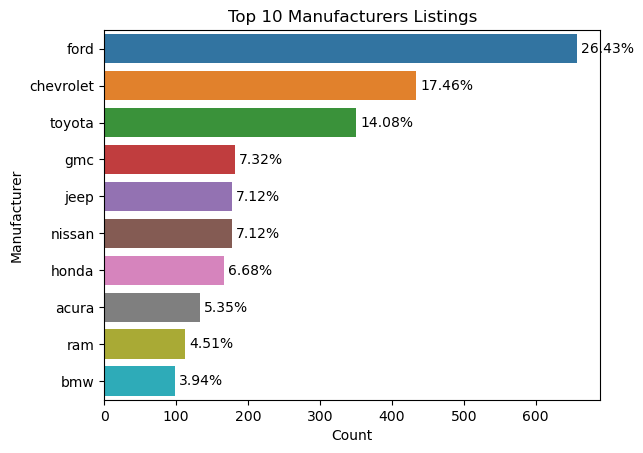

In [24]:
manu_cars = udf['manufacturer'].value_counts()[:10].reset_index()
manu_cars.columns = ['manufacturer', 'count']

# Calculate percentage
manu_cars['percentage'] = (manu_cars['count'] / manu_cars['count'].sum()) * 100

# Create the bar plot
ax = sns.barplot(data=manu_cars, x='count', y='manufacturer')

# Add values on the right side of the bars as percentages
for percentage, p in zip(manu_cars['percentage'], ax.patches):
    ax.annotate(f'{percentage:.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(3, 0), textcoords='offset points')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.title('Top 10 Manufacturers Listings')

# Show the plot
plt.show()

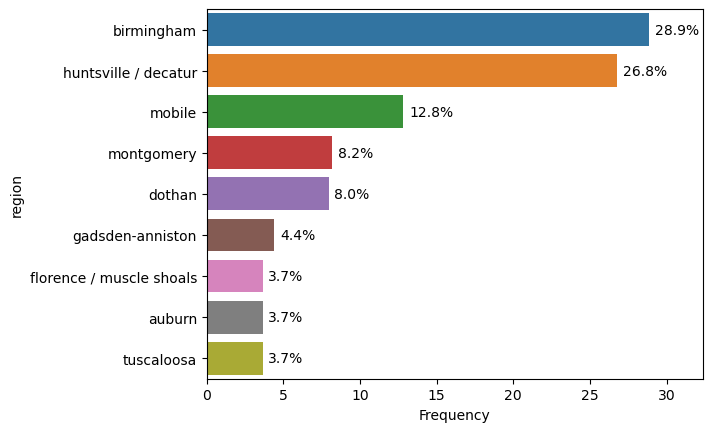

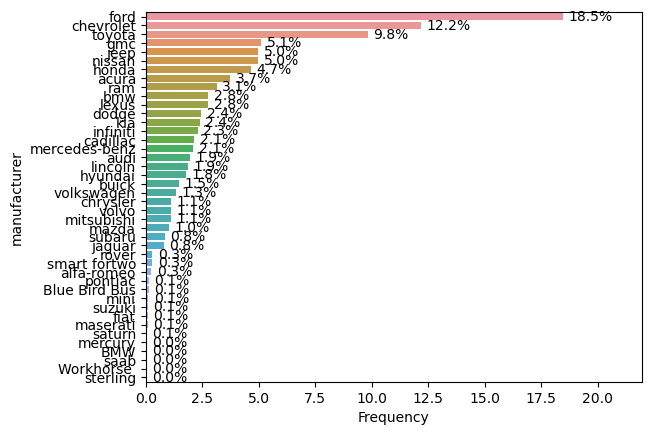

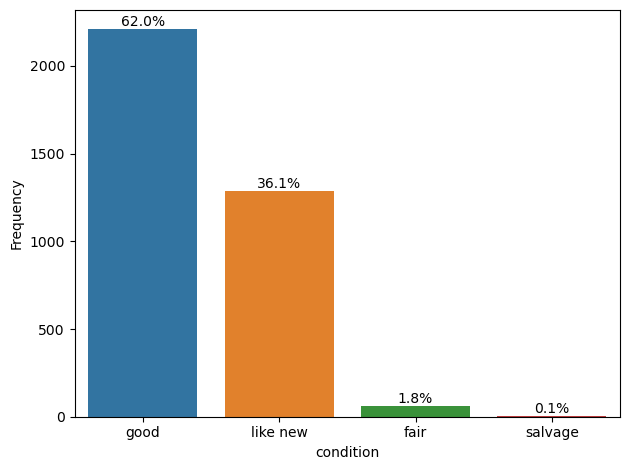

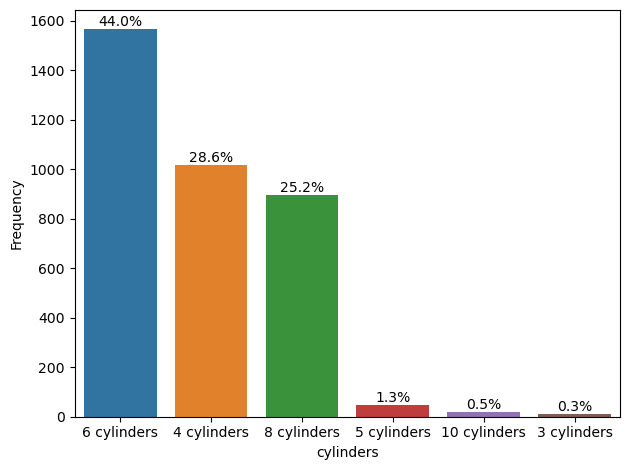

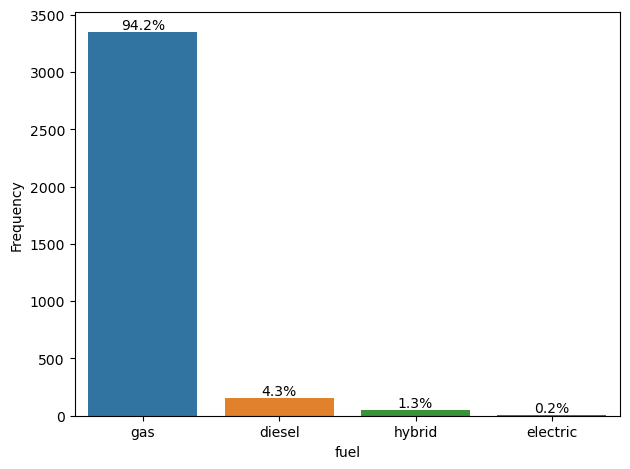

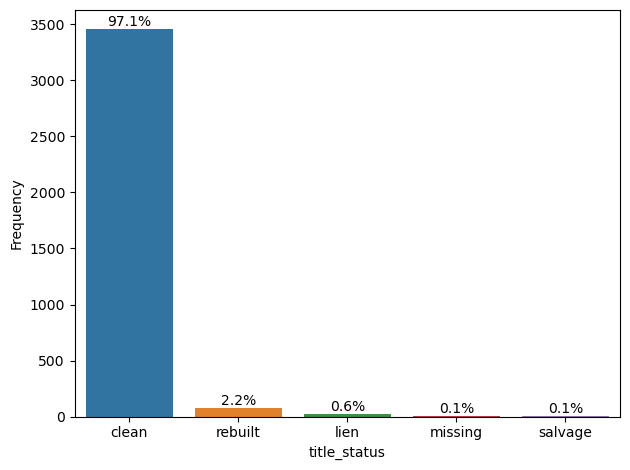

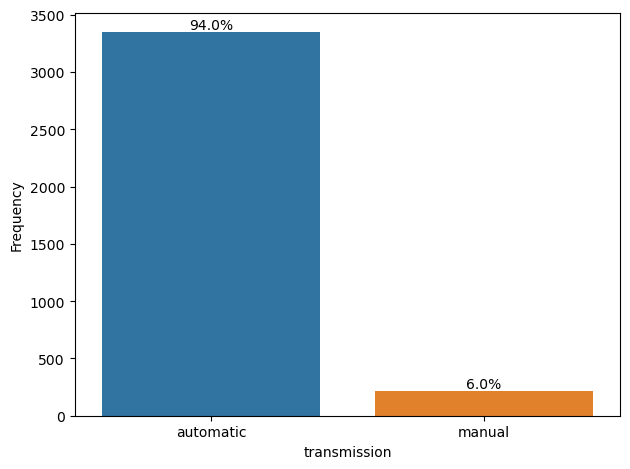

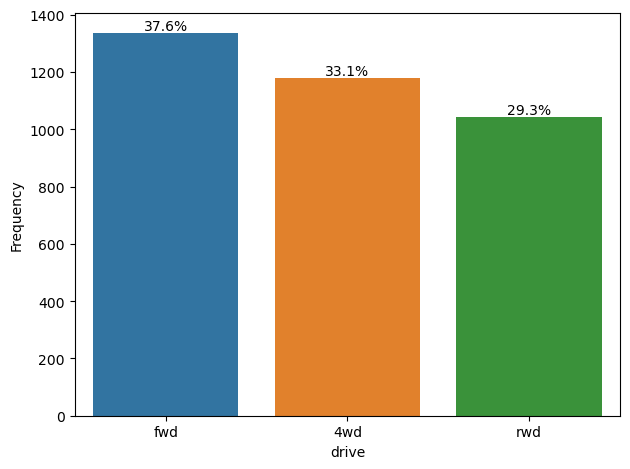

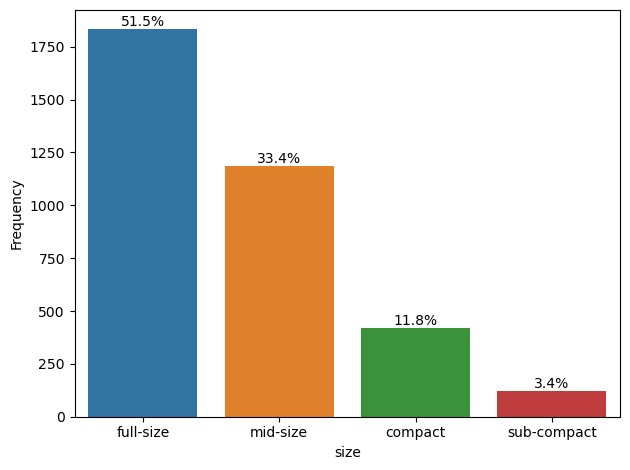

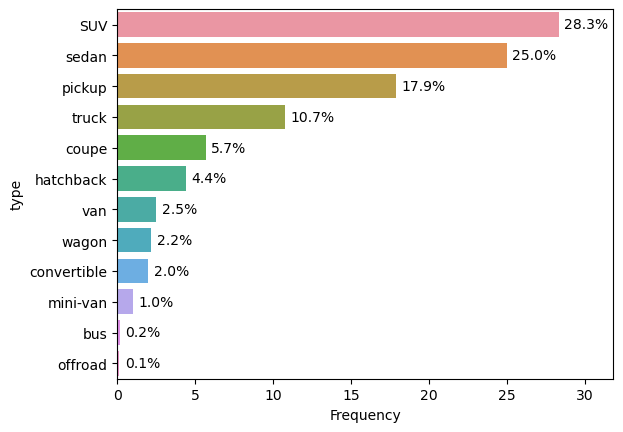

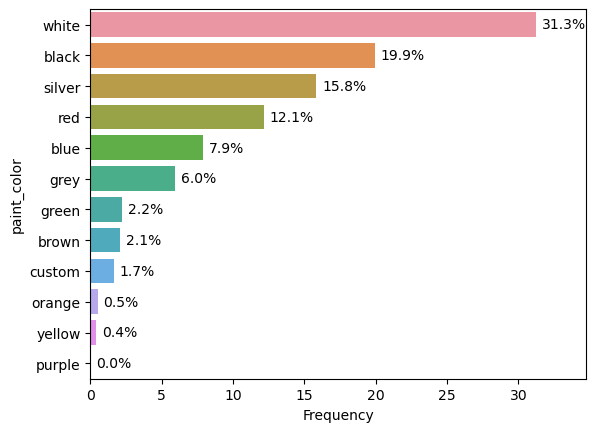

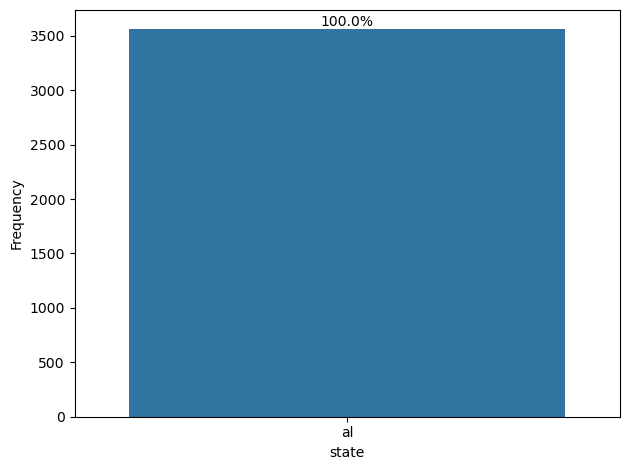

In [25]:
# Simple bar chart
#plt.figure(figsize=(10, 6))  # Adjust the figure size


for i in cat_cols:
    plotdata = udf[i].value_counts().reset_index()
    plotdata = plotdata.sort_values(by='count', ascending=False)
    plotdata.columns = [i, 'count']
    plotdata['percentage'] = (plotdata['count'] / plotdata['count'].sum()) * 100
    
    if plotdata[i].nunique()>6:
        ax= sns.barplot(data=plotdata, x='percentage', y=i)
        ax.set_xlim(0, plotdata['percentage'].max() + 3.5) # Set appropriate x-axis limits
        for percentage, p in zip(plotdata['percentage'], ax.patches):
            ax.annotate(f'{percentage:.1f}%', (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center', xytext=(4, 0), textcoords='offset points')
        plt.xlabel("Frequency")
        #plt.tight_layout()
        plt.show()
    else:
        ax = sns.barplot(data=plotdata, x=i, y='count')
        for p, percentage in zip(ax.patches, plotdata['percentage']):
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

In [26]:
n_cols = udf.select_dtypes(exclude='object').columns.tolist()
n_cols

['price', 'odometer', 'age']

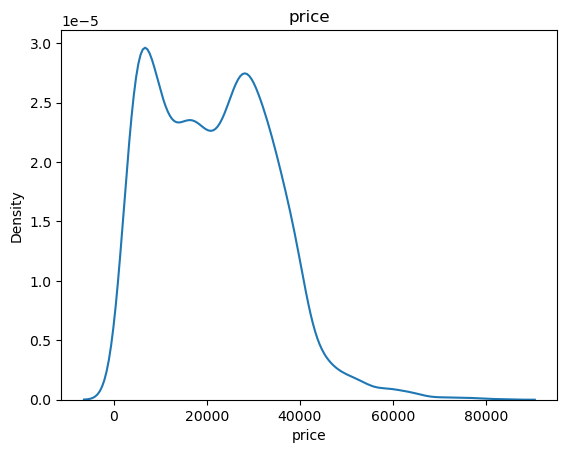

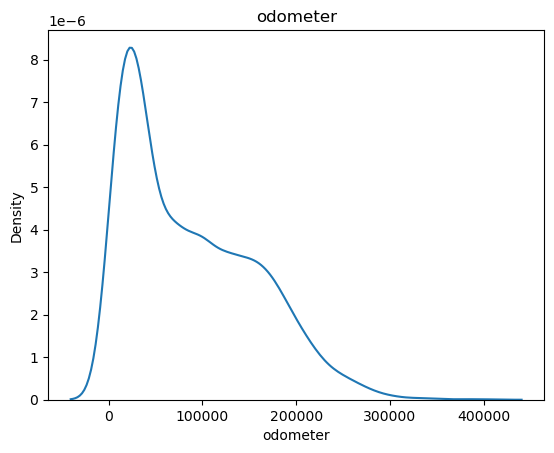

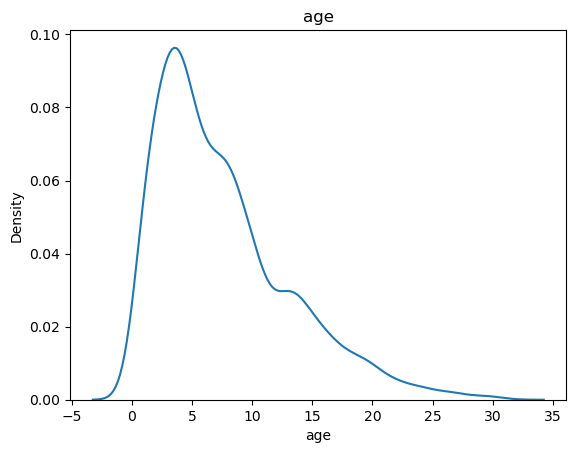

In [27]:
for i in n_cols:
    sns.kdeplot(udf[i], fill=False)
    plt.title(i)
    plt.xlabel(i)
    plt.show()

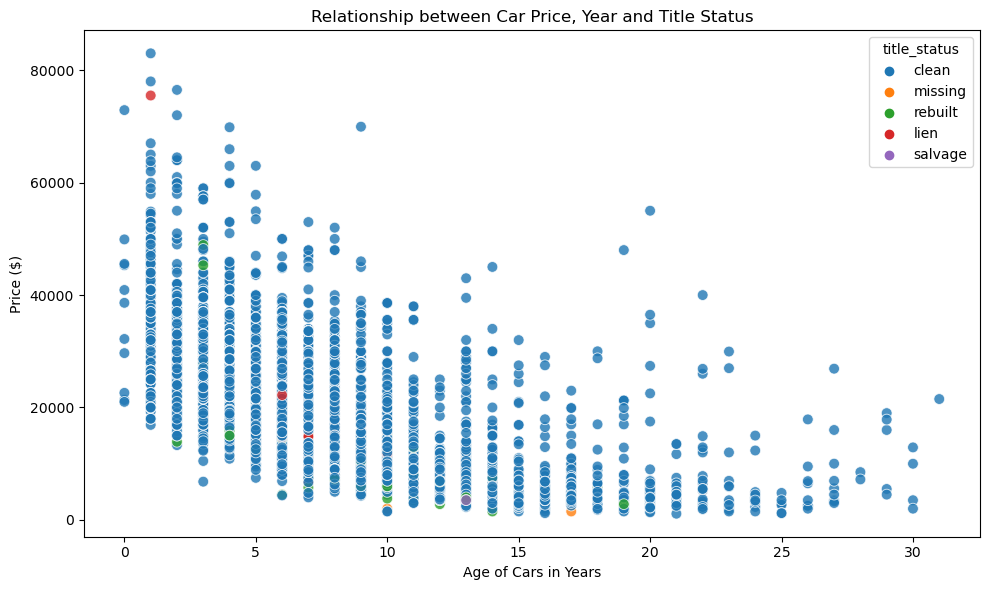

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=udf, y='price', x='age', s=60, alpha=0.8, hue='title_status')
# Set the title and axis labels
plt.title("Relationship between Car Price, Year and Title Status")
plt.xlabel("Age of Cars in Years")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show() 


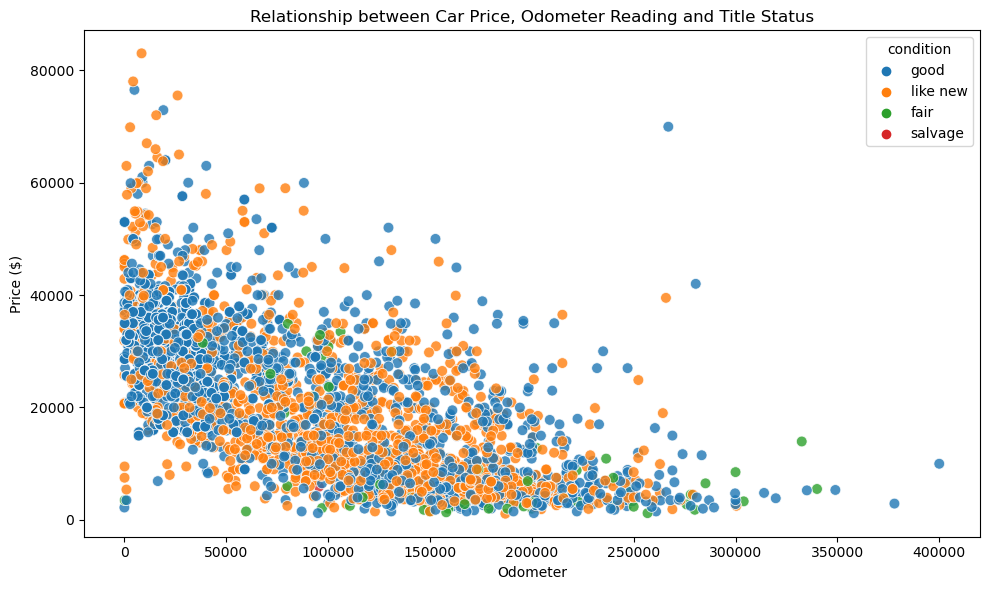

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=udf, y='price', x='odometer', s=60, alpha=0.8, hue='condition')
# Set the title and axis labels
plt.title("Relationship between Car Price, Odometer Reading and Title Status")
plt.xlabel("Odometer")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show() 

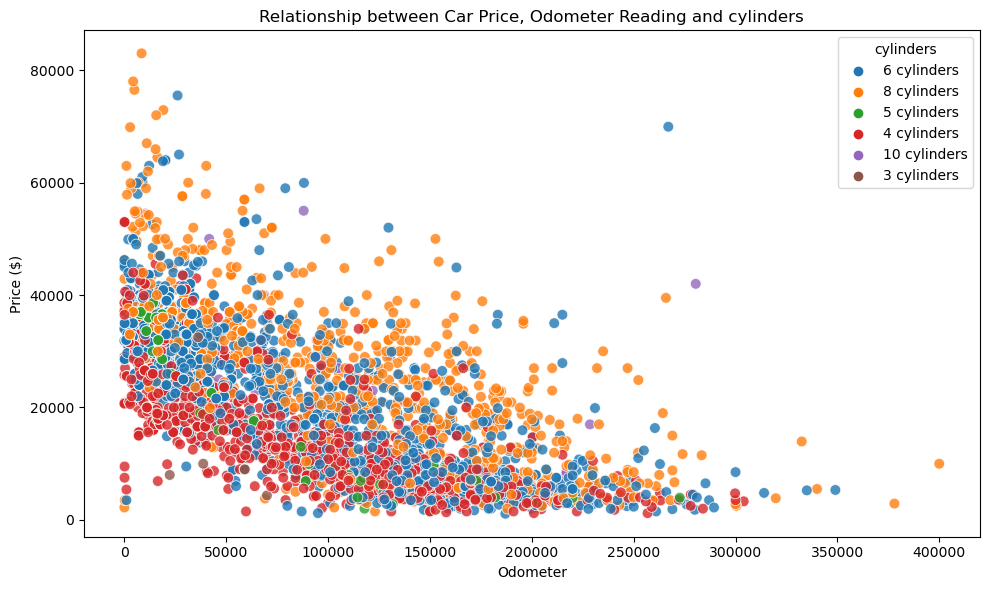

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=udf, y='price', x='odometer', s=60, alpha=0.8, hue='cylinders')
# Set the title and axis labels
plt.title("Relationship between Car Price, Odometer Reading and cylinders")
plt.xlabel("Odometer")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show() 

In [31]:
top_listing = udf['manufacturer'].value_counts().head(8).index
most_listed = udf[udf['manufacturer'].isin(top_listing)]
most_listed

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,nmodel,age
387,huntsville / decatur,18500,ford,transit van,like new,6 cylinders,gas,92000.0,clean,automatic,rwd,full-size,van,white,al,ford transit van,5.0
388,birmingham,22900,ford,transit t250,like new,6 cylinders,gas,95900.0,clean,automatic,rwd,full-size,van,white,al,ford transit t250,5.0
389,mobile,25998,ford,transit passenger,like new,6 cylinders,gas,52460.0,clean,automatic,rwd,full-size,van,white,al,ford transit passenger,2.0
390,birmingham,33990,ford,transit cutaway,good,6 cylinders,gas,117800.0,clean,automatic,rwd,full-size,van,white,al,ford transit cutaway,5.0
391,birmingham,34990,ford,transit cutaway,good,6 cylinders,gas,100058.0,clean,automatic,rwd,full-size,van,white,al,ford transit cutaway,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,birmingham,6500,honda,accord,good,4 cylinders,gas,174000.0,clean,automatic,fwd,mid-size,sedan,grey,al,honda accord,11.0
3627,birmingham,19425,honda,accord,good,4 cylinders,gas,34539.0,clean,automatic,fwd,mid-size,sedan,red,al,honda accord,4.0
3630,birmingham,1500,honda,accord,good,4 cylinders,gas,168000.0,clean,automatic,fwd,mid-size,sedan,red,al,honda accord,19.0
3631,huntsville / decatur,7499,honda,accord,good,4 cylinders,gas,167430.0,clean,automatic,fwd,full-size,sedan,red,al,honda accord,10.0


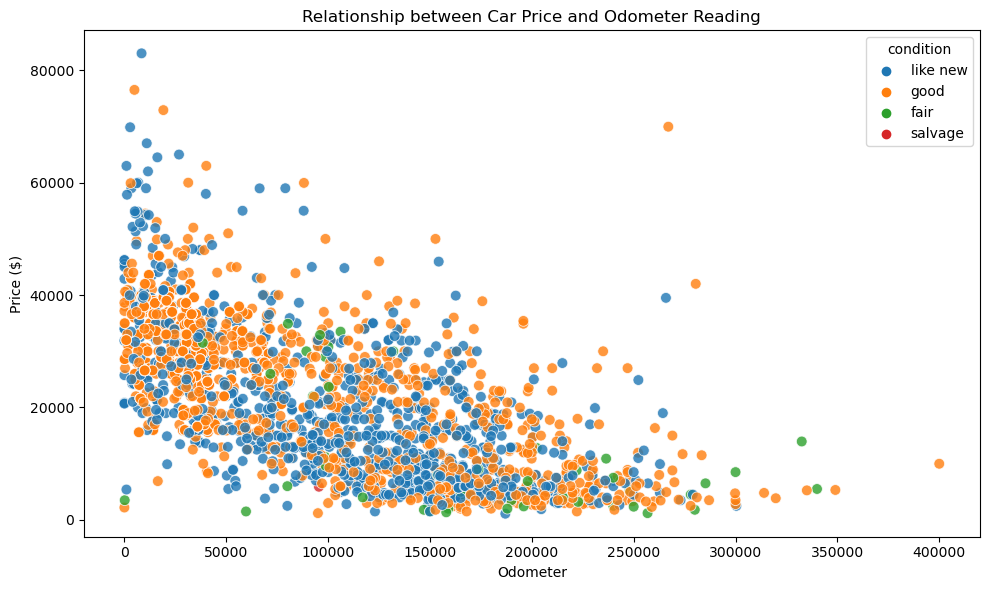

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=most_listed, y='price', x='odometer', s=60, alpha=0.8, hue='condition')
# Set the title and axis labels
plt.title("Relationship between Car Price and Odometer Reading")
plt.xlabel("Odometer")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show() 

In [33]:
udf[n_cols].corr()

,price,odometer,age
price,1.000000,-0.669078,-0.671713
odometer,-0.669078,1.000000,0.712401
age,-0.671713,0.712401,1.000000


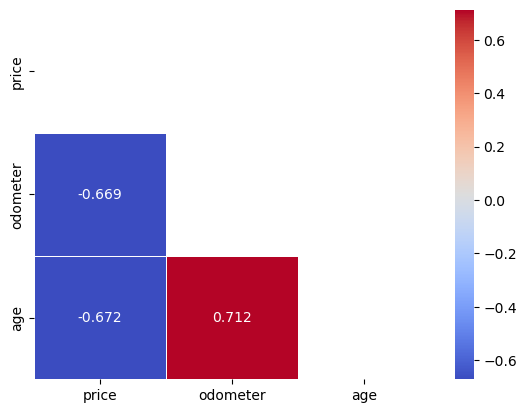

In [34]:
mat_cor = udf[n_cols].corr()


# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(mat_cor, dtype=bool))
sns.heatmap(mat_cor, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, mask=mask)
#plt.title('Correlation Matrix Heatmap')
plt.show()

## Model Building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
import pickle

In [36]:
# Split the data into training and testing sets
df1 = udf[['age', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size', 'type']]

#One-hot encoding on categorical variables

In [37]:
encode = ['condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type']
for col in encode:
    dummy = pd.get_dummies(df1[col], prefix=col)
    df1 = pd.concat([df1, dummy], axis=1)
    del df1[col]

In [38]:
df1.columns

Index(['age', 'odometer', 'condition_fair', 'condition_good',
       'condition_like new', 'condition_salvage', 'cylinders_10 cylinders',
       'cylinders_3 cylinders', 'cylinders_4 cylinders',
       'cylinders_5 cylinders', 'cylinders_6 cylinders',
       'cylinders_8 cylinders', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'transmission_automatic', 'transmission_manual',
       'drive_4wd', 'drive_fwd', 'drive_rwd', 'size_compact', 'size_full-size',
       'size_mid-size', 'size_sub-compact', 'type_SUV', 'type_bus',
       'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van',
       'type_offroad', 'type_pickup', 'type_sedan', 'type_truck', 'type_van',
       'type_wagon'],
      dtype='object')

In [39]:
X = df1
y = udf['price']

In [40]:
y = np.log(y)
y

2        8.909235
3        9.301095
4        9.209340
5        8.895630
6        9.975808
          ...    
3923     8.516993
3925    10.308619
3926     9.093807
3927     8.922658
3928     9.846917
Name: price, Length: 3559, dtype: float64

In [41]:
len(df1.columns.tolist())

37

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pickle.dump(sc, open('scaler.pkl', 'wb'))

In [44]:
sc.feature_names_in_

array(['age', 'odometer', 'condition_fair', 'condition_good',
       'condition_like new', 'condition_salvage',
       'cylinders_10 cylinders', 'cylinders_3 cylinders',
       'cylinders_4 cylinders', 'cylinders_5 cylinders',
       'cylinders_6 cylinders', 'cylinders_8 cylinders', 'fuel_diesel',
       'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       'transmission_automatic', 'transmission_manual', 'drive_4wd',
       'drive_fwd', 'drive_rwd', 'size_compact', 'size_full-size',
       'size_mid-size', 'size_sub-compact', 'type_SUV', 'type_bus',
       'type_convertible', 'type_coupe', 'type_hatchback',
       'type_mini-van', 'type_offroad', 'type_pickup', 'type_sedan',
       'type_truck', 'type_van', 'type_wagon'], dtype=object)

In [45]:
rf = RandomForestRegressor(random_state= 0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
rf.score(X_test, y_test)

0.8707517514001365

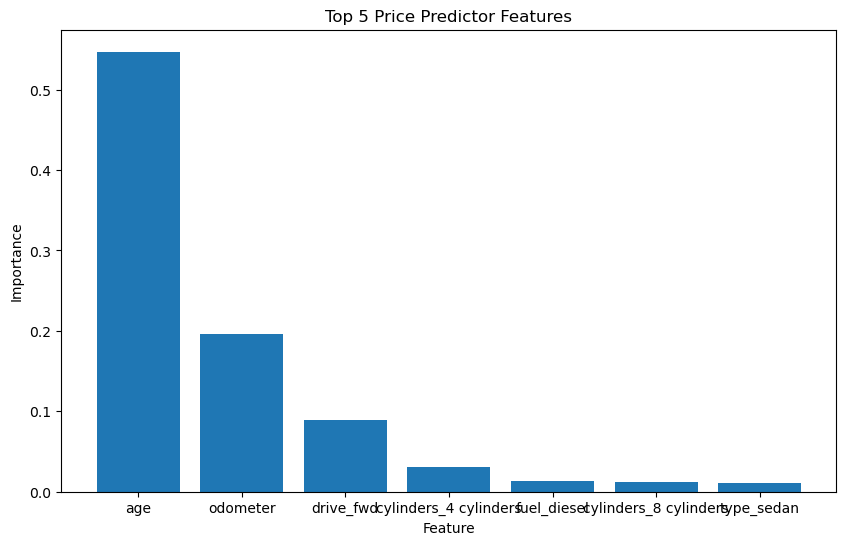

In [47]:
features = rf.feature_importances_

#Get the indices of the top 5 features
top5_indices = np.argsort(features)[::-1][:7]

c_names = X.columns.tolist()
# Get the names of the top 5 features
top5_features = [c_names[i] for i in top5_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, 8), features[top5_indices], tick_label=top5_features)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Price Predictor Features')
plt.show()

In [48]:
top5_features

['age',
 'odometer',
 'drive_fwd',
 'cylinders_4 cylinders',
 'fuel_diesel',
 'cylinders_8 cylinders',
 'type_sedan']

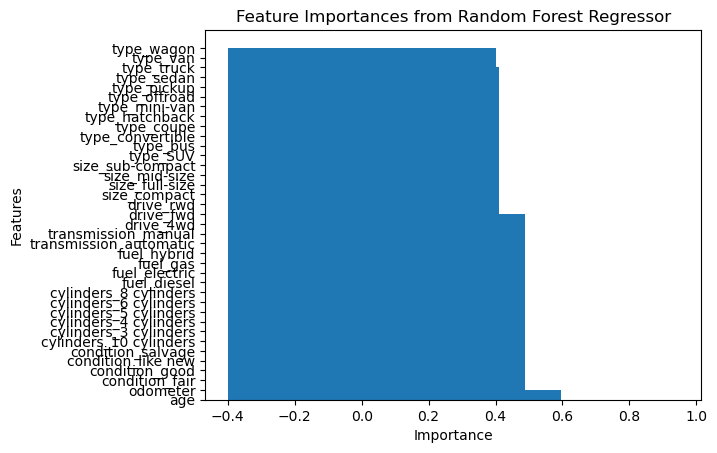

In [49]:
# Plot feature importances
plt.bar(features, X.columns)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()

In [50]:
xgb = XGBRegressor(random_state=0)
xgb.fit(X_train, y_train)

xgtrain = xgb.predict(X_train)
xgpred = xgb.predict(X_test)
print("XGB Test MSE:", mean_squared_error(y_test, xgpred))

XGB Test MSE: 0.08466302369685184


In [51]:
xgb.score(X_test, y_test)

0.8571197770643186

In [52]:
#from sklearn.ensemble import StackingRegressor

# base models for the third ensemble model
baselearner_1 = list()
baselearner_1.append(('xgboost', xgb))
baselearner_1.append(('RF', rf)) ## Using the best 2 model from previous steps that has been fit

# define the weight of each model in the ensemble
weights = [0.5, 0.5]

# stacking ensemble method, and predict on the test set
stack =VotingRegressor(estimators = baselearner_1, weights=weights, n_jobs=5)
stack.fit(X_train, y_train)
train_stack = stack.predict(X_train)
pred_stack = stack.predict(X_test)

In [53]:
stack.score(X_test, y_test)

0.8742792737515791

In [ ]:
pickle.dump(stack, open('cars_model.pkl', 'wb')) #save updated model

In [54]:
import random

# Function to generate a tuple of floats that add up to 1
def generate_tuple():
    # Generate three random floats
    a = round(random.uniform(0, 1), 2)
    b = round(1 - a, 2)
    # Return the tuple
    return (a, b)

# Generate a list of 20 tuples
my_tup = [generate_tuple() for _ in range(20)]
my_tup

[(0.03, 0.97),
 (0.28, 0.72),
 (0.34, 0.66),
 (0.65, 0.35),
 (0.9, 0.1),
 (0.99, 0.01),
 (0.31, 0.69),
 (0.33, 0.67),
 (0.33, 0.67),
 (0.19, 0.81),
 (0.76, 0.24),
 (0.87, 0.13),
 (0.65, 0.35),
 (0.43, 0.57),
 (0.15, 0.85),
 (0.32, 0.68),
 (1.0, 0.0),
 (0.79, 0.21),
 (0.24, 0.76),
 (0.08, 0.92)]

In [55]:
params = {'weights':my_tup}

#fit gridsearch & print best params
grid = GridSearchCV(stack, params)
grid.fit(X_train, y_train)
v = list(grid.best_params_.values())[0]
print(f'The best weights are: {v}')

The best weights are: (0.34, 0.66)


In [56]:
from sklearn.ensemble import VotingRegressor

# base models for the third ensemble model
baselearner_2 = list()
baselearner_2.append(('xgboost', xgb))
baselearner_2.append(('RF', rf)) ## Using the model from previous steps that has been fit

# define the weight of each model in the ensemble
weights = [x for x in v]

# stacking ensemble method, and predict on the test set
stack1 = VotingRegressor(estimators = baselearner_2, weights=weights)
stack1.fit(X_train, y_train)
train_stack_1 = stack1.predict(X_train)
pred_stack_1 = stack1.predict(X_test)

In [57]:
stack1.score(X_test, y_test)

0.8754012142705284

In [ ]:
pickle.dump(stack1, open('cars_model1.pkl', 'wb')) #save updated model